# **Visualizing the WRF Output**

The code below required a new CF based NetCDF files generated from native WRFOUT NetCDF files using `wrfout_to_cf.ncl` from https://sundowner.colorado.edu/wrfout_to_cf/overview.html 

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from windrose import WindroseAxes

In [10]:
# Visualising the Wind
# With 3 days of hourly information, there are several ways to visualize wind speed 
# and direction to best illustrate the information. 

# Load the WRF output file
ds = xr.open_dataset('wrfout_d03_2024-01-21_00', engine='netcdf4')

# Extract the wind speed and direction variables
u_wind = ds.u_10m_gr.values
v_wind = ds.v_10m_gr.values

# Calculate the wind speed and direction
wind_speed = (u_wind ** 2 + v_wind ** 2) ** 0.5
wind_direction = 180 + (180 / np.pi) * np.arctan2(v_wind, u_wind)

# Get the first and last date in the dataset
start_date = pd.to_datetime(ds.time.values[0]).strftime('%Y-%m-%d %H:%M:%S')
end_date = pd.to_datetime(ds.time.values[-1]).strftime('%Y-%m-%d %H:%M:%S')

# Create a map projection
proj = ccrs.PlateCarree()


OSError: [Errno -51] NetCDF: Unknown file format: 'd:\\Personal\\Estudio\\Universidad\\Matriculas\\Octava\\Métodos de Simulación\\Trabajos\\Proyecto Final\\Codigo\\Analisis de Datos\\Datos\\wrf2024-01-22\\wrfout_d03_2024-01-21_00'

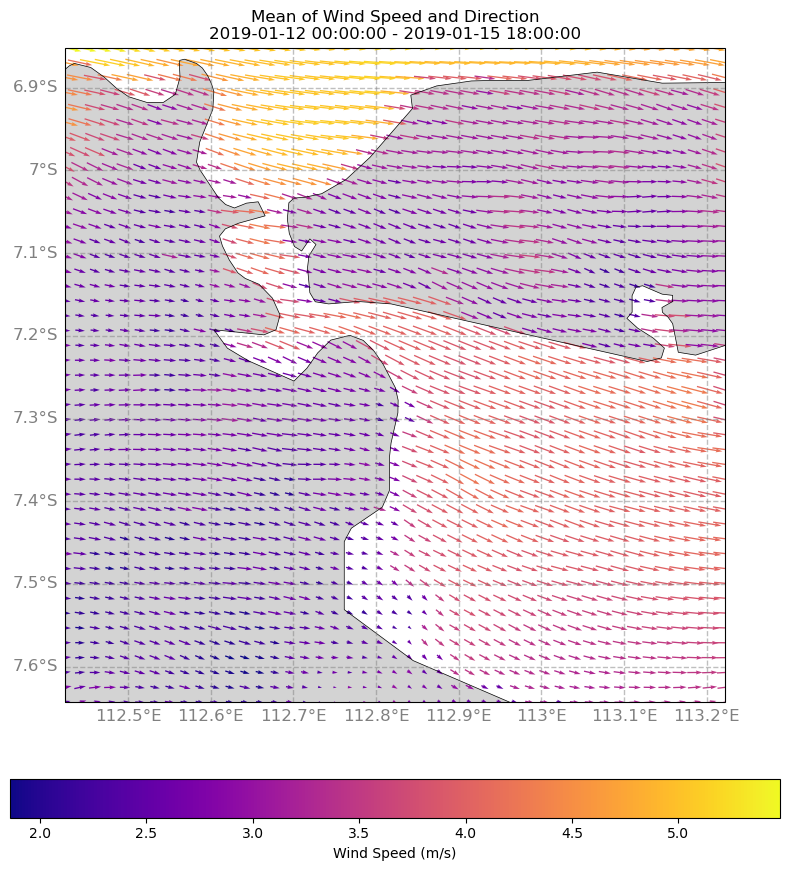

In [ ]:
# Time series plot
# We can create a time series plot showing the variation of wind speed and direction 
# over the three-day period. This type of plot is useful for identifying patterns 
# or trends in the data over time. 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

# Set the plot extent
ax.set_extent([ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Add the latitude and longitude grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Add the wind vectors
q = ax.quiver(ds.lon.values, ds.lat.values, u_wind.mean(axis=0), v_wind.mean(axis=0), wind_speed.mean(axis=0),
          transform=ccrs.PlateCarree(), cmap='plasma', pivot='middle', width=0.002, scale=80)

# Add a colorbar
cbar = fig.colorbar(q, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.set_xlabel('Wind Speed (m/s)')

# Create a string with the title and date information
title_str = f'Mean of Wind Speed and Direction\n{start_date} - {end_date}'

# Add a title
plt.title(title_str)

# Show the plot
plt.show()

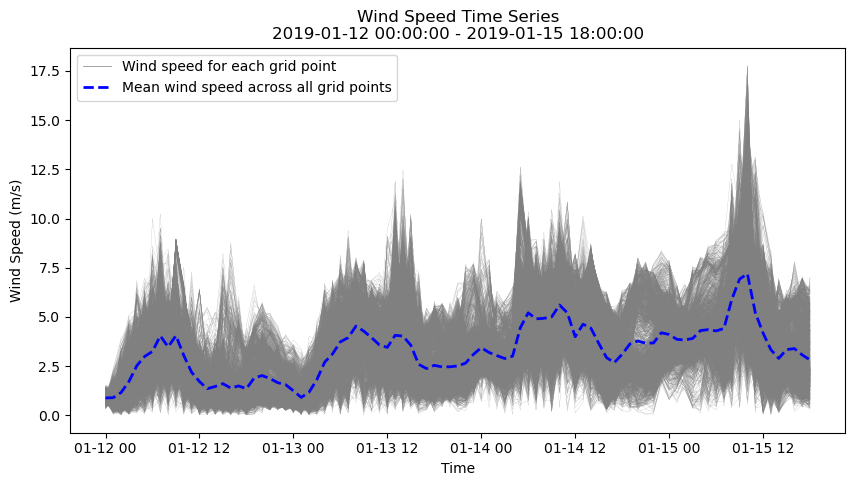

In [4]:
# Time series plot
# As alternative plot, we can visualise it for each grid as a line over time

# Create a figure and axis object for time series plot
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot wind speed for each grid point as a line
for i in range(wind_speed.shape[1]):
    for j in range(wind_speed.shape[2]):
        ax2.plot(ds.time.values, wind_speed[:, i, j], color='Grey', linewidth=0.1)

# Calculate and plot the mean wind speed across all grid points for each time step
wind_speed_mean = wind_speed.mean(axis=(1, 2))
lines2 = ax2.plot(ds.time.values, wind_speed_mean, linestyle='--', color='blue', linewidth=2)

# Set x-axis label
ax2.set_xlabel('Time')

# Set y-axis label
ax2.set_ylabel('Wind Speed (m/s)')

# Create a string with the title and date information
title_str = f'Wind Speed Time Series\n{start_date} - {end_date}'

# Add a title
plt.title(title_str)

# Add legend
legend_elements = [Line2D([0], [0], color='gray', lw=0.5, label='Wind speed for each grid point'),
                   Line2D([0], [0], linestyle='--', color='blue', lw=2, label='Mean wind speed across all grid points')]
ax2.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()

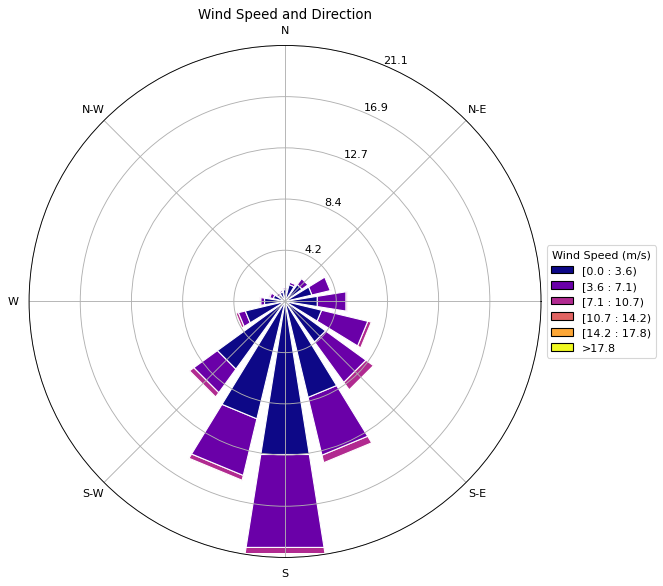

In [5]:
# Wind rose plot
# A wind rose plot can be used to show the distribution of wind direction and speed 
# over the three-day period. This type of plot is useful for identifying the prevailing 
# wind direction and speed.

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()

# Plot the wind rose
ax.bar(wind_direction.flatten(), wind_speed.flatten(), normed=True, opening=0.8, edgecolor='white', cmap=cm.plasma)

# Set the title and legend
ax.set_title('Wind Speed and Direction')
ax.legend(title='Wind Speed (m/s)', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

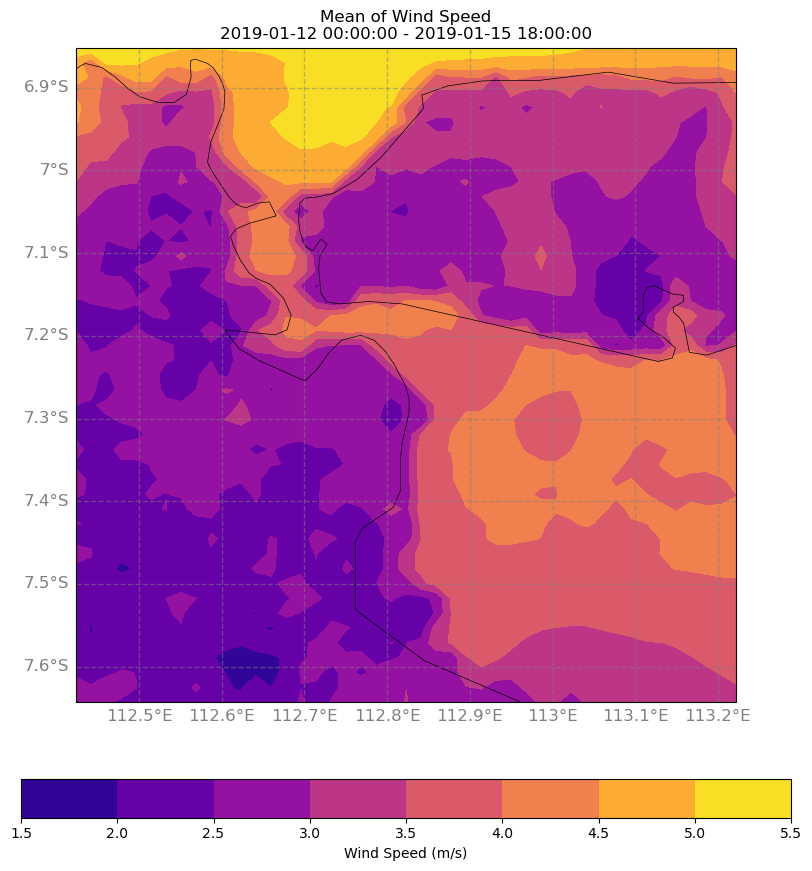

In [6]:
# Contour plot
# A contour plot can be used to show the spatial distribution of wind speed and direction 
# at a particular time during the three-day period. This type of plot is useful for 
# identifying areas with high or low wind speed and direction. 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

# Set the plot extent
ax.set_extent([ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Add the latitude and longitude grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Create a contour plot of wind speed
cf = ax.contourf(ds.lon, ds.lat, wind_speed.mean(axis=0),
                 transform=ccrs.PlateCarree(), cmap='plasma')

# Add a colorbar
cbar = fig.colorbar(cf, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.set_xlabel('Wind Speed (m/s)')

# Create a string with the title and date information
title_str = f'Mean of Wind Speed\n{start_date} - {end_date}'

# Add a title
plt.title(title_str)

# Show the plot
plt.show()

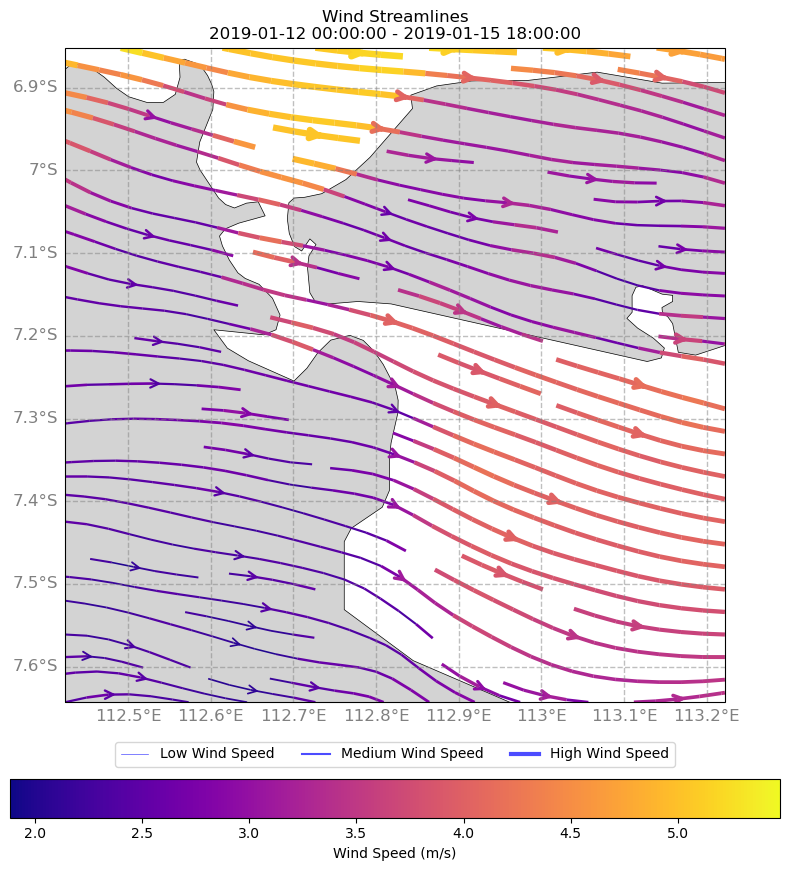

In [7]:
# Streamline plot
# A streamline plot can be used to show the flow of wind direction and speed at 
# a particular time during the three-day period. This type of plot is useful for 
# identifying the flow of wind over a geographic area. 

# Define the maximum and minimum line width
max_width = 5.0
min_width = 1.0

# Normalize the streamline speed to the range [0, 1]
speed_norm = (wind_speed.mean(axis=0) - wind_speed.mean(axis=0).min()) / (wind_speed.mean(axis=0).max() - wind_speed.mean(axis=0).min())

# Calculate the linewidths based on the normalized speed
linewidths = min_width + (max_width - min_width) * speed_norm

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

# Set the plot extent
ax.set_extent([ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Add the latitude and longitude grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Add the wind streamlines
strm = ax.streamplot(ds.lon.values, ds.lat.values, u_wind.mean(axis=0), v_wind.mean(axis=0),
                     transform=ccrs.PlateCarree(), cmap='plasma', density=1, color=wind_speed.mean(axis=0),
                     linewidth=linewidths, arrowstyle='->', arrowsize=1.5, minlength=0.1)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='blue', linewidth=0.5, linestyle='-', alpha=0.7,
           label='Low Wind Speed'),
    Line2D([0], [0], color='blue', linewidth=1.5, linestyle='-', alpha=0.7,
           label='Medium Wind Speed'),
    Line2D([0], [0], color='blue', linewidth=3, linestyle='-', alpha=0.7,
           label='High Wind Speed')
]

# Create a colorbar
cbar = plt.colorbar(strm.lines, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Wind Speed (m/s)')

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Create a string with the title and date information
title_str = f'Wind Streamlines\n{start_date} - {end_date}'

# Add a title
plt.title(title_str)

# Show the plot
plt.show()
